In [11]:
import Modules.SQcircuit_extensions as sq_ext
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
import importlib

importlib.reload(sq_ext)

<module 'Modules.SQcircuit_extensions' from 'C:\\Users\\gabri\\PycharmProjects\\tunable-capacitive-coupling-flux-qubits\\Modules\\SQcircuit_extensions.py'>

# Single qubit

This notebook studies the qubit proposed by KIT. It's lumped element model is:
<img src='Other/Single qubit 4 nodes CC coupled to ground.jpg' width='500'>


## Define the circuit

In [31]:
# Circuit parameters
Csh = 15
C   = 15
Cg  = 10
CJ  = 3
Lq  = 25
Lr  = 10
Δ   = 0.1
# Δ   = 0.00001
# Δ   = 0.000000001
Δ   = 10
# Δ   = 0
EJ  = 10.0
l = Lq*(Lq+4*Lr) - 4*Δ**2

# Initialize loop(s)
loop = sq.Loop(0.0)  # "Value" corresponds to phiExt / phi0 threading the loop (can change later)
elements = {
    # Without ground node
    (0, 3): [sq.Inductor (Lr,       'nH')],
    (0, 1): [sq.Capacitor(C,        'fF')],
    (0, 2): [sq.Capacitor(C,        'fF')],
    (3, 1): [sq.Inductor (Lq/2 - Δ, 'nH',  loops=[loop])],
    (1, 2): [sq.Junction (EJ,       'GHz', loops=[loop]), sq.Capacitor(CJ+Csh, 'fF')],
    (2, 3): [sq.Inductor (Lq/2 + Δ, 'nH',  loops=[loop])],

    # With ground node
    # (0, 1): [sq.Capacitor(Cg,       'fF')],
    # (1, 4): [sq.Inductor (Lr,       'nH')],
    # (1, 2): [sq.Capacitor(C,        'fF')],
    # (1, 3): [sq.Capacitor(C,        'fF')],
    # (4, 2): [sq.Inductor (Lq/2 - Δ, 'nH',  loops=[loop])],
    # (2, 3): [sq.Junction (EJ,       'GHz', loops=[loop]), sq.Capacitor(CJ+Csh, 'fF')],
    # (3, 4): [sq.Inductor (Lq/2 + Δ, 'nH',  loops=[loop])],
}

# Create the circuits
qubit = sq.Circuit(elements)
qubit.description()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
qubit.S

array([[ 1.72026745e+01,  5.05170698e+01, -4.83005796e-01],
       [ 1.82026745e+01,  4.95170698e+01,  5.16994204e-01],
       [ 3.45304159e+08,  3.07829540e+01,  7.99662964e-03]])

In [10]:
loop_eq = sq.Loop(0.0)

elements_equiv = {
    (0, 1): [sq.Capacitor(C/2, 'fF'), sq.Inductor (l/Lq, 'nH')],
    # (0, 1): [sq.Capacitor(C/2, 'fF'), sq.Inductor ( 1/(  1/(l/Lq) -  1/(l/Δ)  ), 'nH')],
    (1, 2): [sq.Capacitor(C/2, 'fF')],
    # (1, 2): [sq.Inductor (l/Δ, 'nH')],
    (0, 2): [sq.Capacitor(C/2 + Csh + CJ, 'fF'), sq.Inductor(l/(Lq+4*Lr), 'nH', loops=[loop_eq]), sq.Junction(EJ, 'GHz', loops=[loop_eq])],
    # (0, 2): [sq.Capacitor(C/2 + Csh + CJ, 'fF'), sq.Inductor ( 1/(  1/(l/(Lq+4*Lr)) -  1/(l/Δ)  ), 'nH',  loops=[loop_eq]), sq.Junction (EJ, 'GHz', loops=[loop_eq])],
    # (2,1): [sq.Capacitor (l/Δ, 'fF')],

}
qubit_equiv = sq.Circuit(elements_equiv )


LinAlgError: Last 2 dimensions of the array must be square

In [11]:
qubit_equiv.description()
print(qubit_equiv.C)
print(qubit_equiv.L)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[[7.500010e-15 0.000000e+00]
 [0.000000e+00 2.550002e-14]]
[[15384994.09216227        0.        ]
 [       0.         40000984.63962189]]


In [218]:
print(qubit_equiv.L)
print(qubit_equiv.C)

[[0.]]
[[2000.]]


In [7]:
qubit.S

array([[-4.72152571e-11, -4.75703809e-12,  1.20483932e-14,
        -1.99198278e+14],
       [ 1.72026760e+01, -5.05170698e+01,  4.83005796e-01,
        -1.99198278e+14],
       [ 1.82026760e+01, -4.95170698e+01, -5.16994204e-01,
        -1.99198278e+14],
       [ 3.45304189e+08, -3.07829540e+01, -7.99662964e-03,
        -1.99198278e+14]])

## Analyze the convergence of truncation numbers vs external flux

In [6]:
# external flux for sweeping over
phi = np.linspace(-1,1,100)
n_eig=5

# calculate truncation numbers for initial, mid and final value of external flux.
trunc_vs_phi = []
loop.set_flux(phi[0])
qubit = sq_ext.truncation_convergence(qubit, n_eig, plot=True, threshold = 1e-2)
trunc_vs_phi.append(qubit.m)

loop.set_flux(phi[len(phi)//2])
qubit = sq_ext.truncation_convergence(qubit, n_eig, trunc_nums=qubit.m, threshold = 1e-2)
trunc_vs_phi.append(qubit.m)

loop.set_flux(phi[-1])
qubit = sq_ext.truncation_convergence(qubit, n_eig, trunc_nums=qubit.m, threshold = 1e-2)
trunc_vs_phi.append(qubit.m)

print(trunc_vs_phi)


KeyboardInterrupt



## Spectrum vs external flux

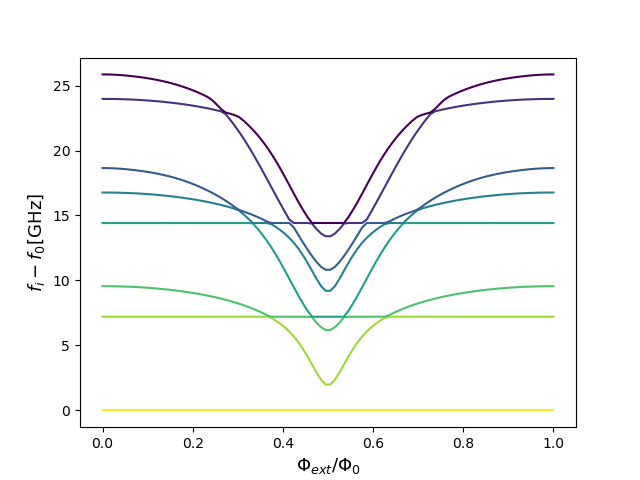

In [70]:
qubit.set_trunc_nums([1, 3, 10])

# spectrum of the circuit
phi = np.linspace(0,1,100)
n_eig=8
spec = np.zeros((n_eig, len(phi)))

eig_colors = plt.get_cmap('viridis_r')(np.linspace(0, 255, n_eig).astype('int'))

for i in range(len(phi)):
    # set the external flux for the loop
    loop.set_flux(phi[i])
    # diagonlize the circuit
    spec[:, i] = qubit.diag(n_eig)[0]

plt.figure()
for i in range(n_eig):
    plt.plot(phi, spec[i,:]- spec[0,:], color=eig_colors[i])

plt.xlabel(r"$\Phi_{ext}/\Phi_0$", fontsize=13)
plt.ylabel(r"$f_i-f_0$[GHz]", fontsize=13)
plt.show()

## Eigenstates in phase base

In [73]:
# creat the phase grid
phi1 = 0
phi2 = np.linspace(-0.005, 0.005, 100)
phi3 = np.linspace(-0.5, 0.5  , 100)
grid = [phi1, phi2, phi3]

state0_vs_ext_flux = []
state1_vs_ext_flux = []
state2_vs_ext_flux = []
state3_vs_ext_flux = []

ext_flux_list = [0.5, 0.55, 0.65, 1]
# loop thorugh several values of external flux
for ext_flux in ext_flux_list:
    loop.set_flux(ext_flux)
    _, _ = qubit.diag(n_eig=5)

    # Calculate eigenstates in phase coord
    state0_vs_ext_flux.append(qubit.eig_phase_coord(0, grid=grid))
    state1_vs_ext_flux.append(qubit.eig_phase_coord(1, grid=grid))
    state2_vs_ext_flux.append(qubit.eig_phase_coord(2, grid=grid))
    state3_vs_ext_flux.append(qubit.eig_phase_coord(3, grid=grid))

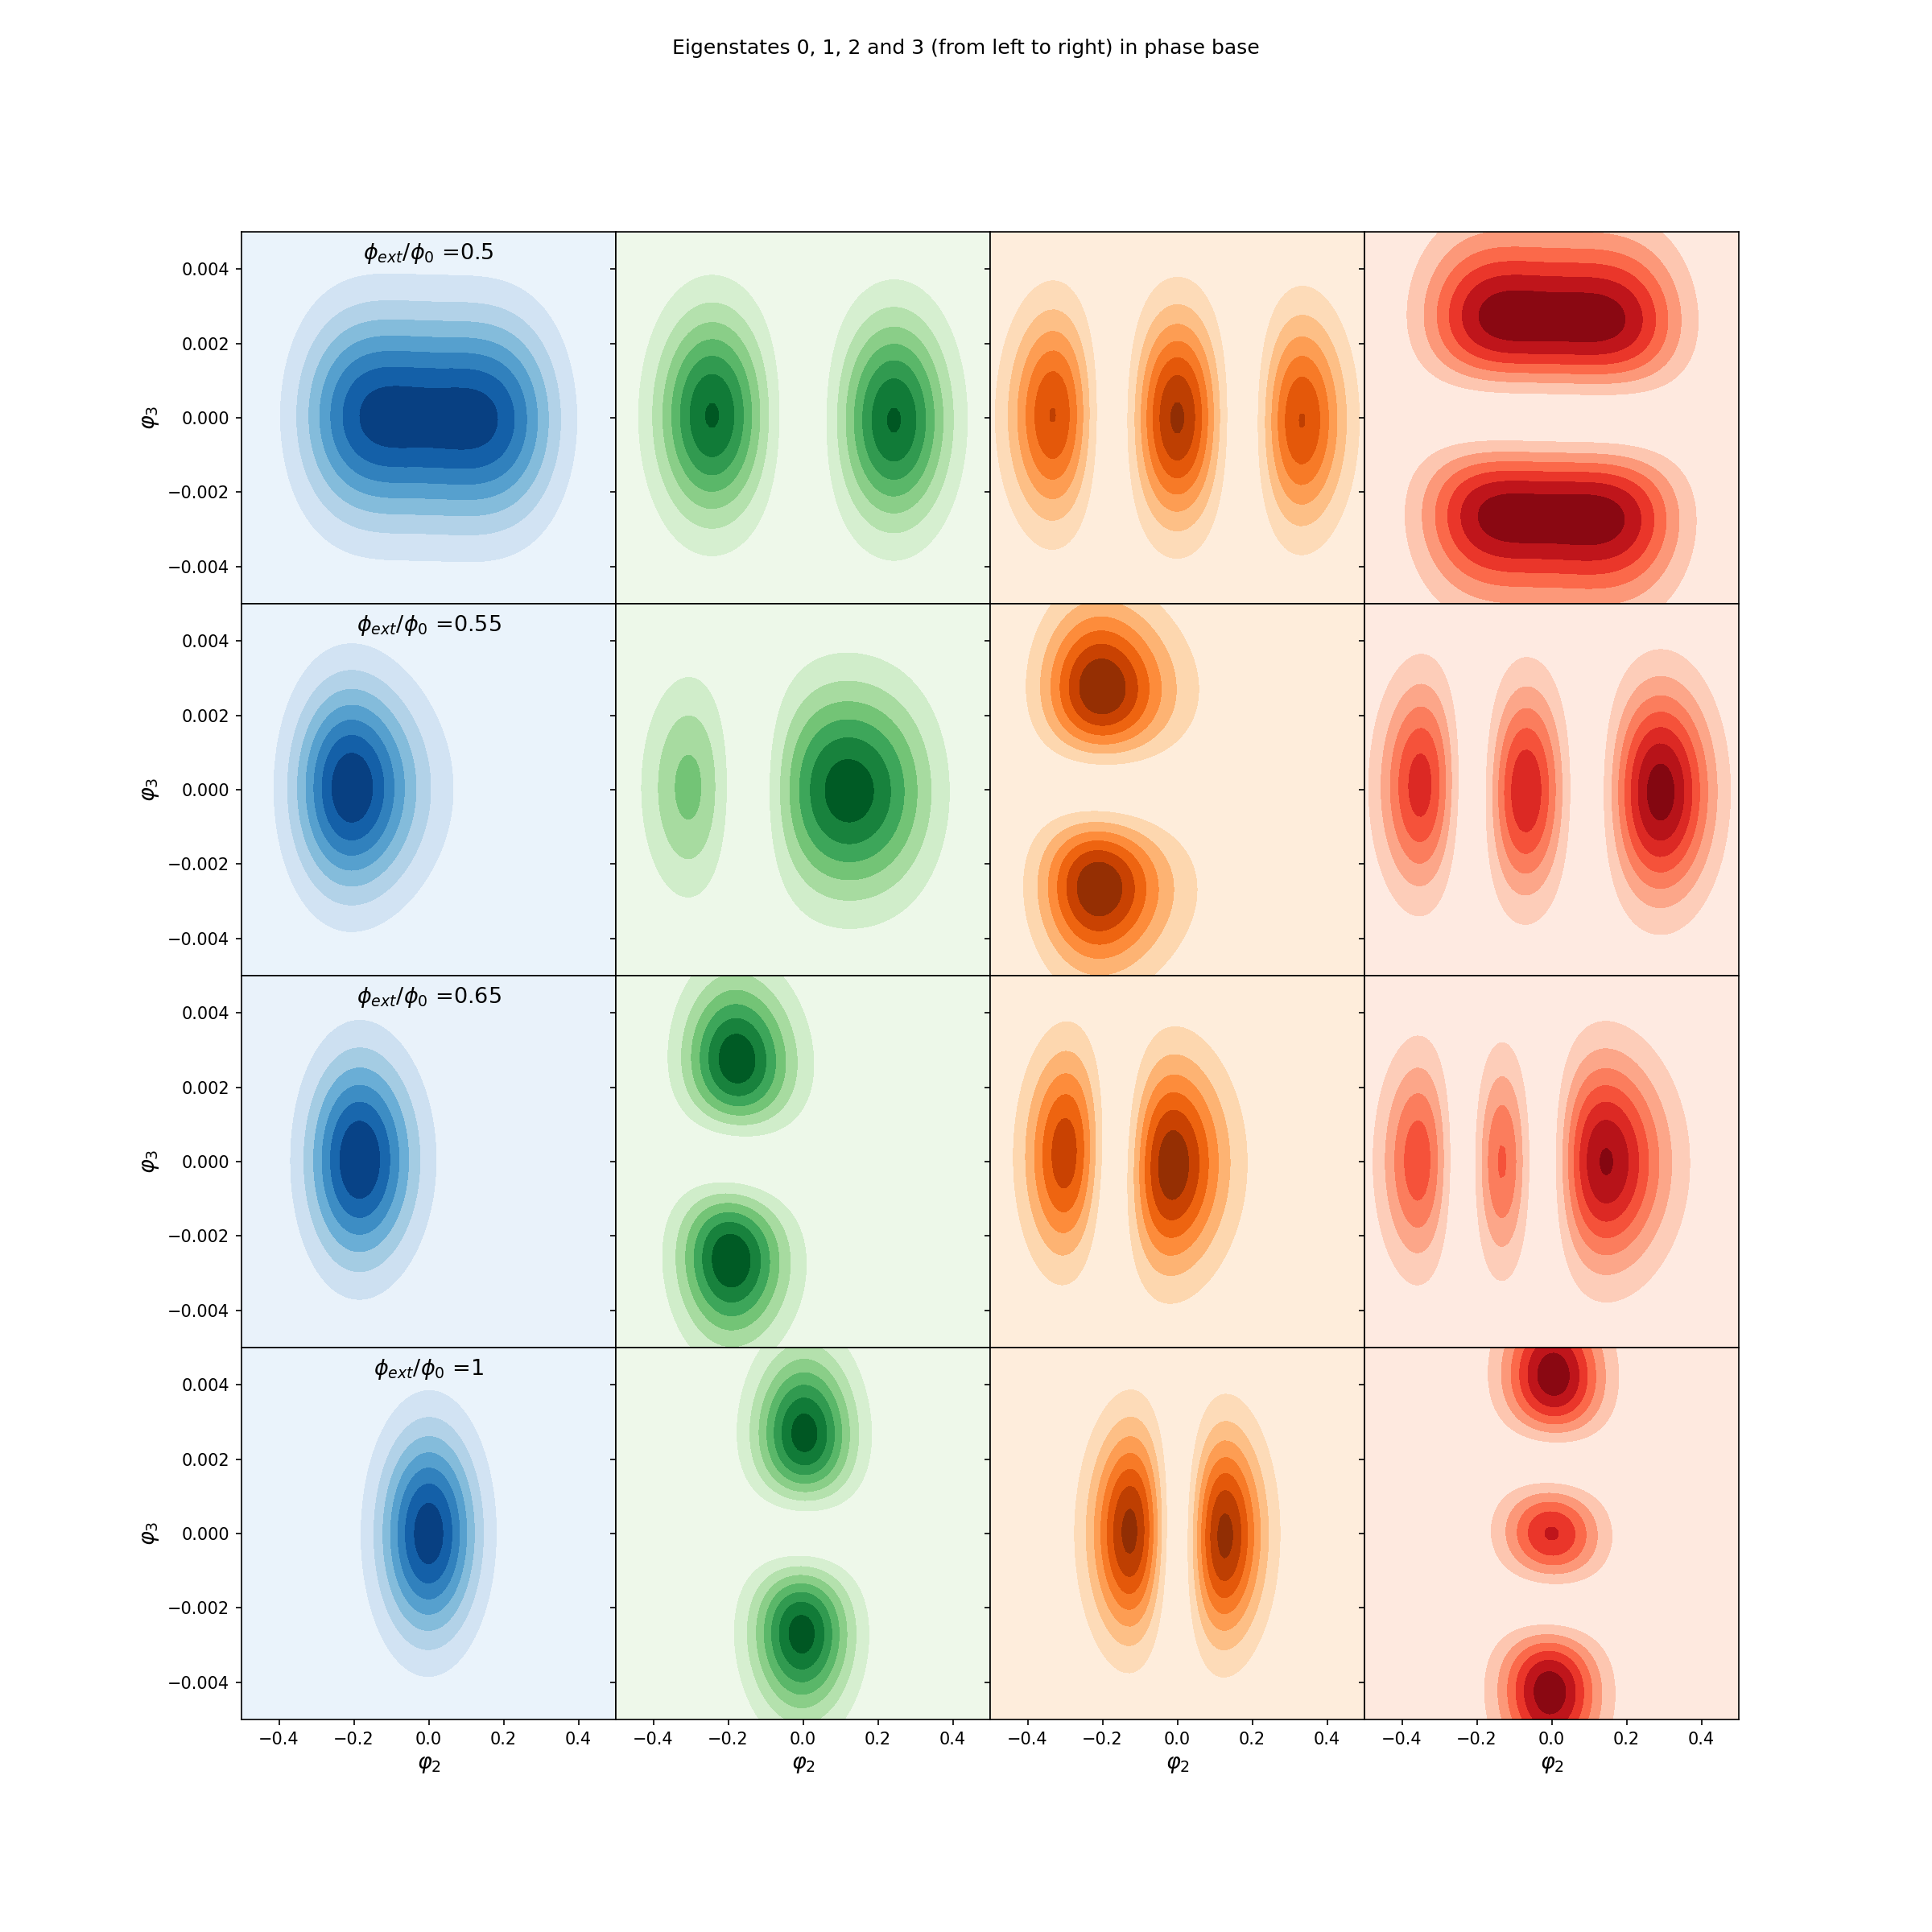

In [74]:
fig, axs = plt.subplots(4, 4, figsize=(4*4, 4*4), sharey='row', sharex = 'col', dpi=150)

for i, ext_flux in enumerate(ext_flux_list):
    axs[i, 0].contourf(phi3, phi2, np.abs(state0_vs_ext_flux[i].T) ** 2, cmap="Blues", )
    axs[i, 1].contourf(phi3, phi2, np.abs(state1_vs_ext_flux[i].T) ** 2, cmap="Greens" )
    axs[i, 2].contourf(phi3, phi2, np.abs(state2_vs_ext_flux[i].T) ** 2, cmap="Oranges")
    axs[i, 3].contourf(phi3, phi2, np.abs(state3_vs_ext_flux[i].T) ** 2, cmap="Reds"   )
    for j in range(4):
        axs[-1, j].set_xlabel(r"$\varphi_2$", fontsize=13)
    axs[i, 0].set_ylabel(r"$\varphi_3$", fontsize=13)
    axs[i, 0].set_title('$\phi_{ext}/\phi_{0}$ ='+f'{ext_flux}', fontsize=13, y=0.9 )
fig.suptitle('Eigenstates 0, 1, 2 and 3 (from left to right) in phase base')
plt.subplots_adjust(wspace=0)
plt.subplots_adjust(hspace=0)
plt.show()